In [1]:
import numpy as np
import matplotlib.pyplot as plt

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

We define a function which is a cosine. We will try to fit it with a polynomial. We generate $N = 30$ data points of the form $(x, f(x) + \mathtt{noise})$ randomly. The noise is made from small random numbers.

In [3]:
def f(X):return np.cos(1.5 * np.pi * X) # this is the true function underlying the data, the 'real' data
                                        # we try to approximate it with a poly regr

np.random.seed(0)
N = 30
X = np.sort(np.random.rand(N)) # random train intervall/set
y = f(X) + np.random.randn(N) * 0.1
X = np.reshape(X, (N, 1))

In [4]:
print(X.shape) # (30, 1)

(30, 1)


In [5]:
# X # one dim vector

In [6]:
np.random.randn(N) * 0.1 # noise

array([-0.05108051, -0.11806322, -0.00281822,  0.04283319,  0.00665172,
        0.03024719, -0.06343221, -0.03627412, -0.06724604, -0.03595532,
       -0.08131463, -0.17262826,  0.01774261, -0.04017809, -0.16301983,
        0.04627823, -0.09072984,  0.00519454,  0.07290906,  0.01289829,
        0.11394007, -0.12348258,  0.04023416, -0.06848101, -0.08707971,
       -0.05788497, -0.03115525,  0.00561653, -0.11651498,  0.09008265])

We generate samples between 0 and 1, which we would like to 

In [7]:
X_test = np.linspace(0, 1, 500)
X_test = np.reshape(X_test, (len(X_test), 1))
print(len(X_test)) # vector of length 500
# X_test contains 500 numbers between 0 and 1..
# why do we need this data?
# we only use it for the prediction
# so we would like to see what f is between 0 and 1 and how well the modell describes it...
# essentially X_test does define the prediction intervall here

500


The function $\texttt{model_and_plot}$ takes a natural number $k$ as input and creates a model that uses all of the numbers $$ x^0, x^1, x^2, \cdots, x^k $$ as features. The resulting model is plotted together with the data.

In [8]:
from sklearn.metrics import mean_squared_error

def model_and_plot(k, X, y, X_test): # k = pol grad, X = input data, y = target variable, X_test prediction set
    polynomial_features = PolynomialFeatures(degree=k, include_bias=False)
    X_train = polynomial_features.fit_transform(X) # poly of 'real' data           # unsupervised transformations, because no y was given
    X_test  = polynomial_features.fit_transform(X_test) # poly of fake linear data # unsupervised transformations, because no y was given
    # I do not understand this transformation... why do we need it?
    # precalculation: x --> (1 (?), x, x^2, x^3, ..., x^k) it just prepares the variables to give them to the model...
    
    M = LinearRegression()
    M.fit(X_train, y) # try to fit the 'real' data with a line (linear regression)
    print('R2 score =', M.score(X_test, f(X_test[:,0]))) # R2 is the linear correlation between two data sets
    # probably as an indicator how good the linear regression should be ...
    # normally we do not know f(X) because we try to find it...
    # in this case it tells us how 'typical' our test data X_test is for the 'real' function...
    # but as mentioned, the stronger influence is probably how 'linear' f(X) is...
    # I do not understand why we take the score for f(X), I would take the modell output y...???

    y_test = M.predict(X_test) # the learned linear modell should now predict the target variable
    mse=mean_squared_error(f(X_test[:,0]),y_test)
    print('MSE =', mse) # measure for error of linear modell

    plt.figure(figsize=(15, 10))
    plt.plot(X_test[:,0], y_test, label="Model") # data predicted by model
    plt.plot(X_test[:,0], f(X_test[:,0]), label="cos(3/2*pi*x)") # perfect data without noise, not used in model 
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples") # 'real' data with noise, used in model
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.show()

Now, we will be giving different degree for the polynomial and checking the results:

R2 score = 0.5863435384204052
MSE = 0.18845011004155157


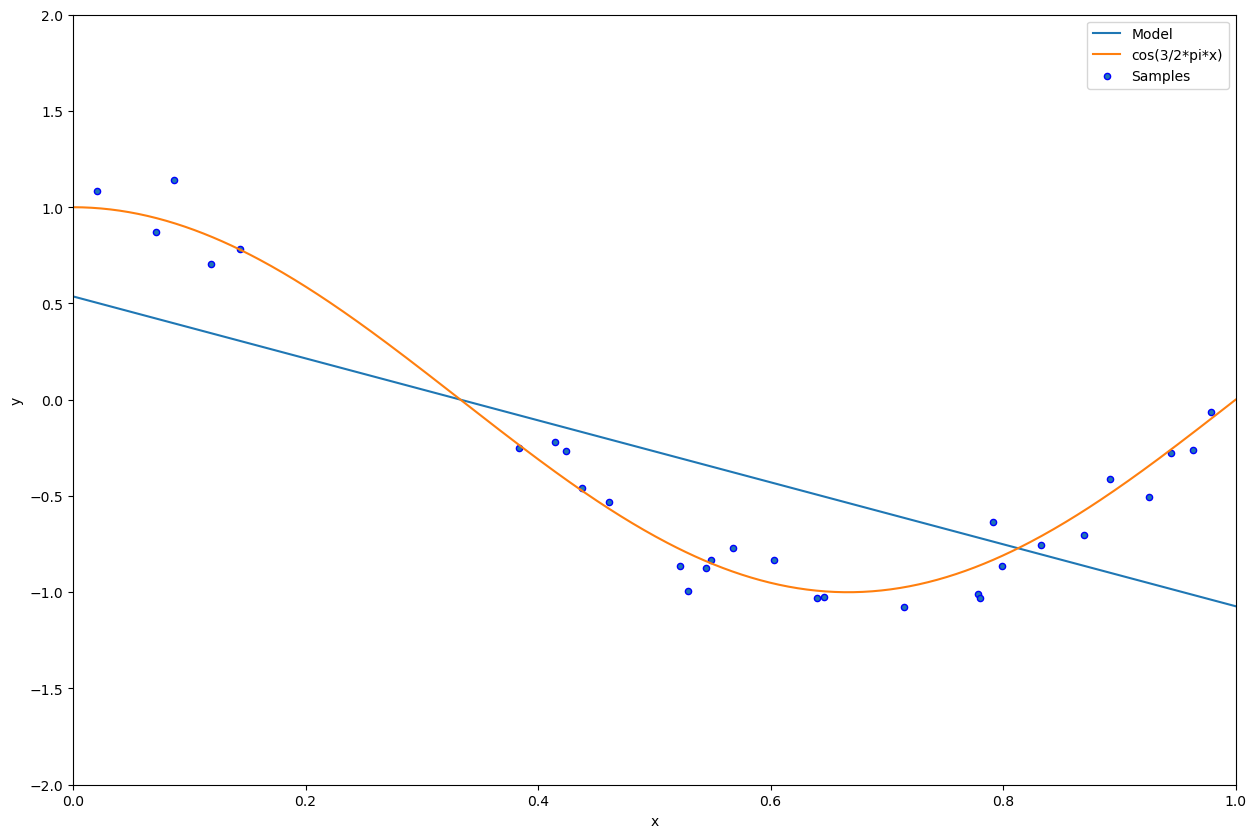

In [9]:
from sklearn.metrics import mean_squared_error

model_and_plot(1, X, y, X_test) # degree = 1 --> linear regression

# low correlation

R2 score = 0.9966925529606234
MSE = 0.001506778731672724


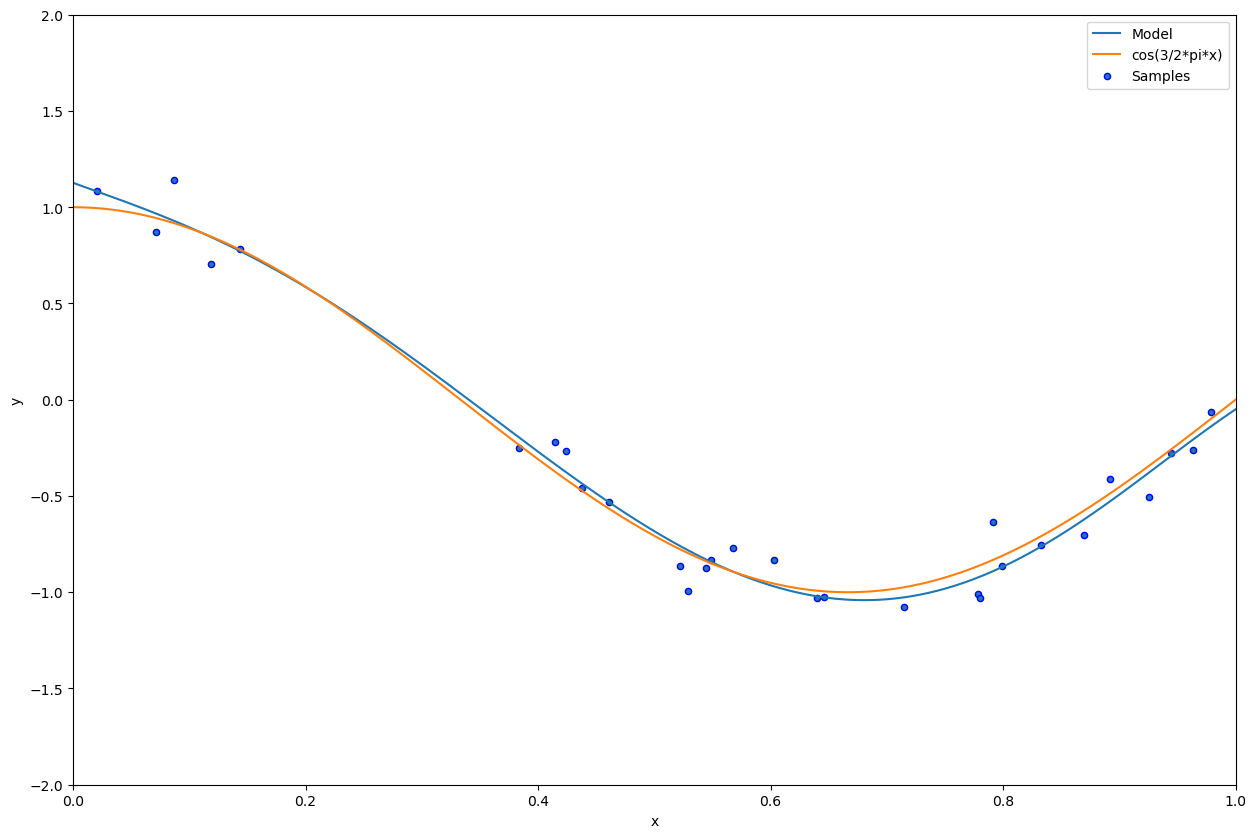

In [10]:
model_and_plot(5, X, y, X_test)


R2 score = 0.7199712821046629
MSE = 0.1275731134493997


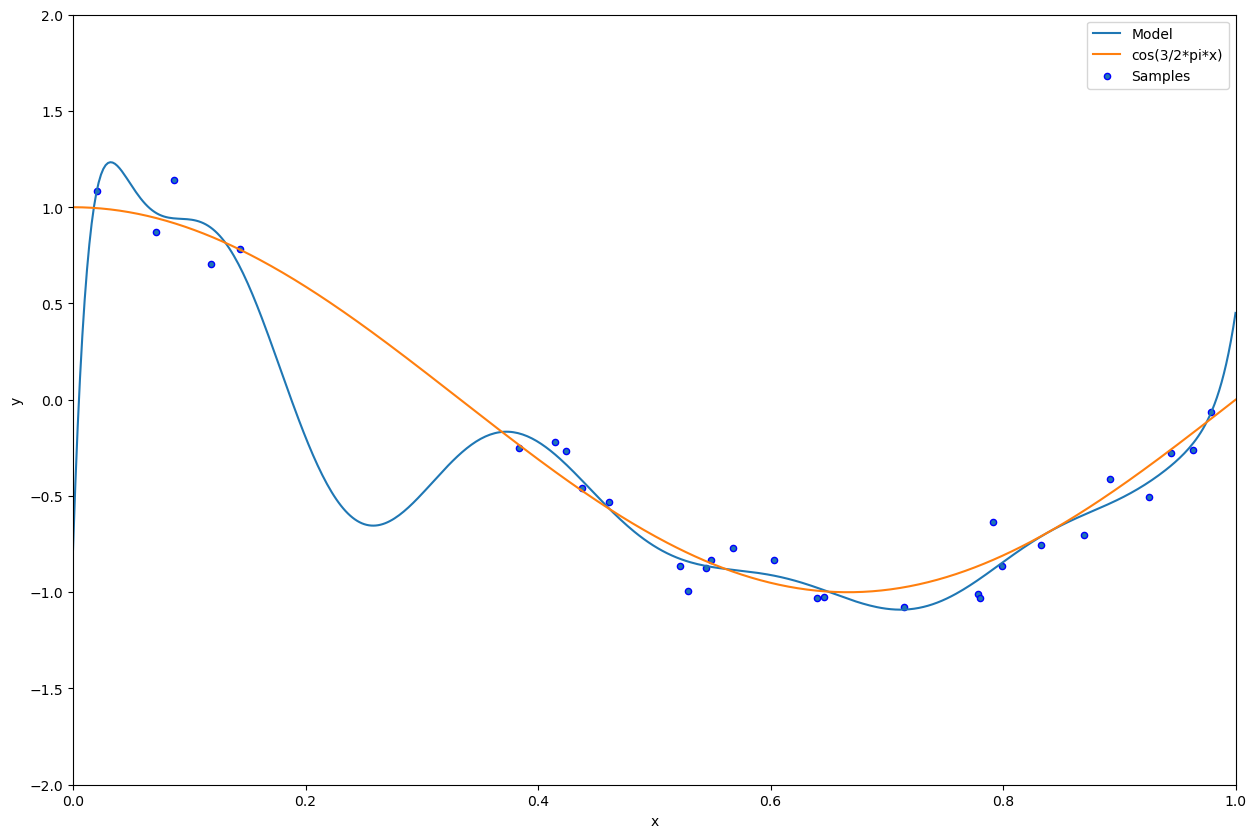

In [11]:
model_and_plot(13, X, y, X_test)


R2 score = 0.9960963797279533
MSE = 0.001778378287670201


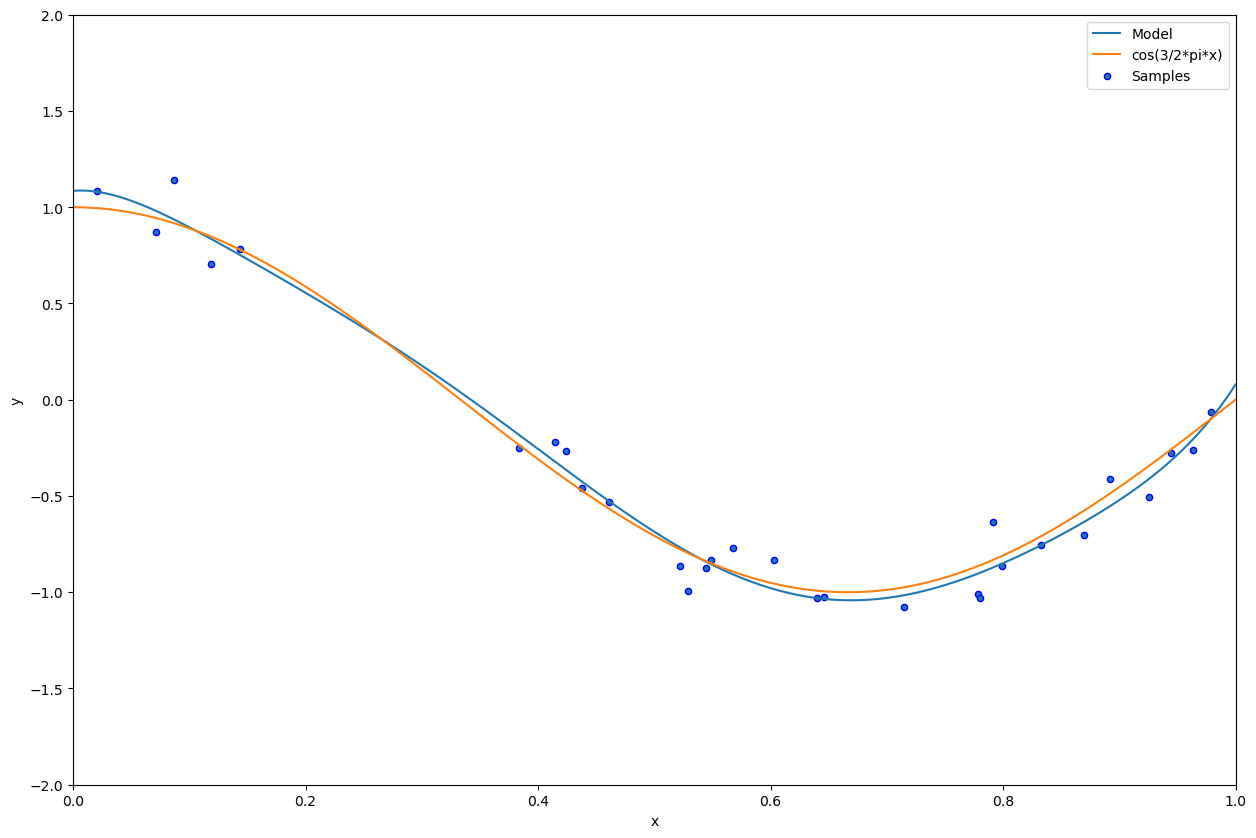

In [12]:

model_and_plot(7, X, y, X_test)


R2 score = 0.9914204868401414
MSE = 0.003908581997980428


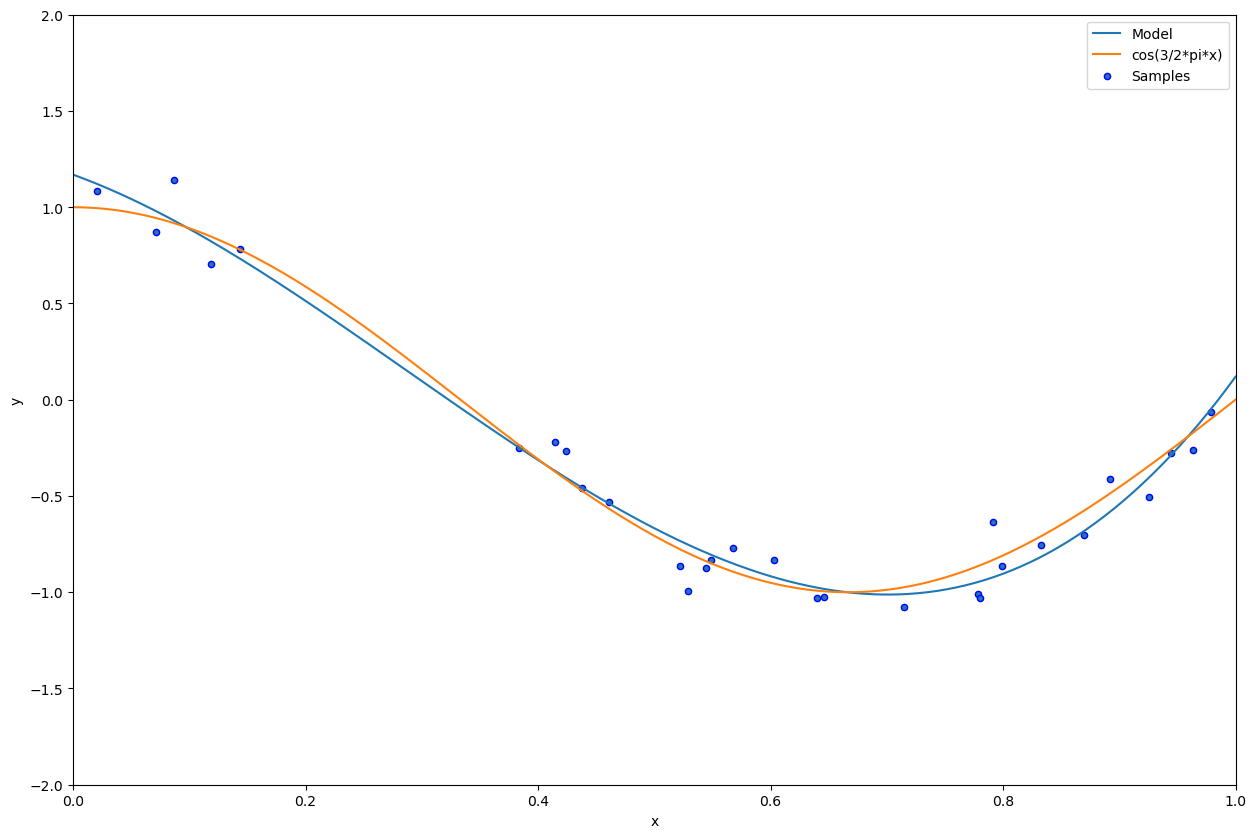

In [13]:
model_and_plot(3, X, y, X_test)


R2 score = 0.9852709190737138
MSE = 0.006710150037957183


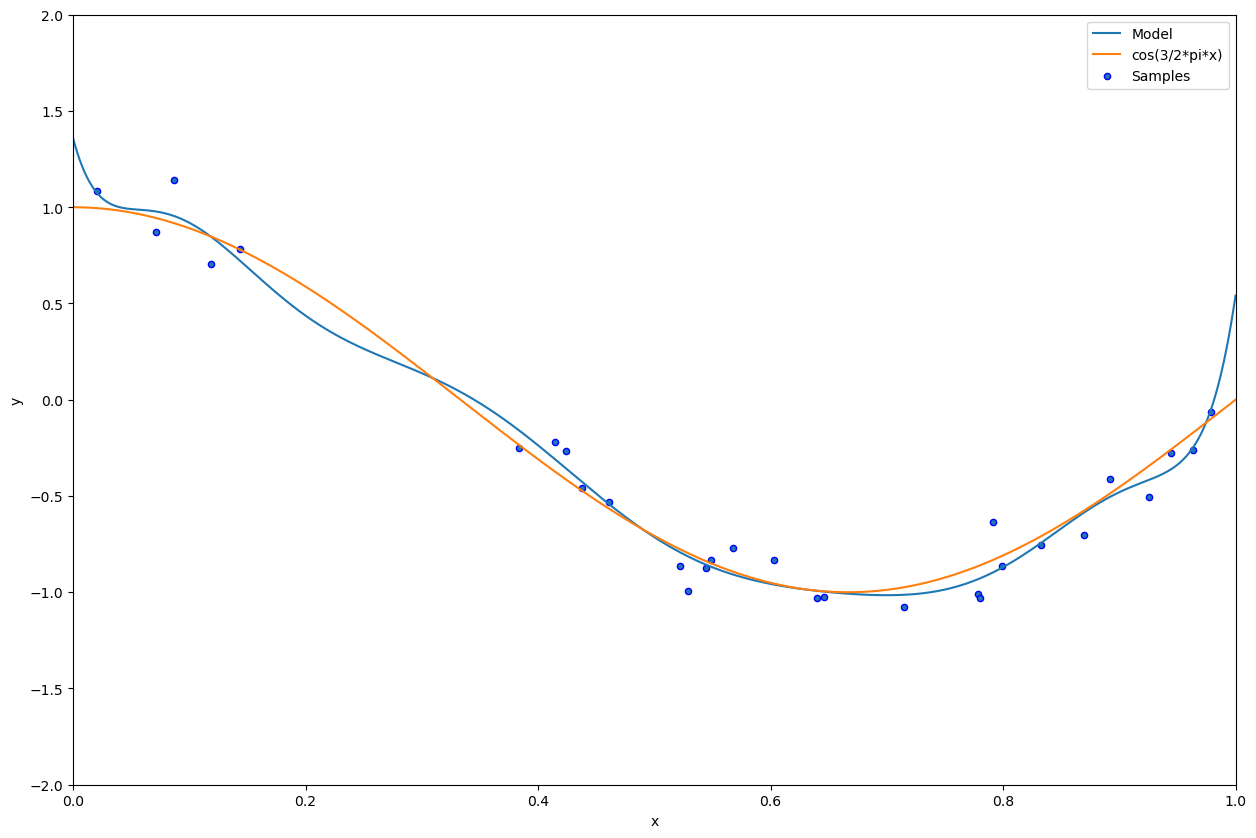

In [14]:
model_and_plot(10, X, y, X_test)


R2 score = -2.1505987278557575
MSE = 1.4353231052984428


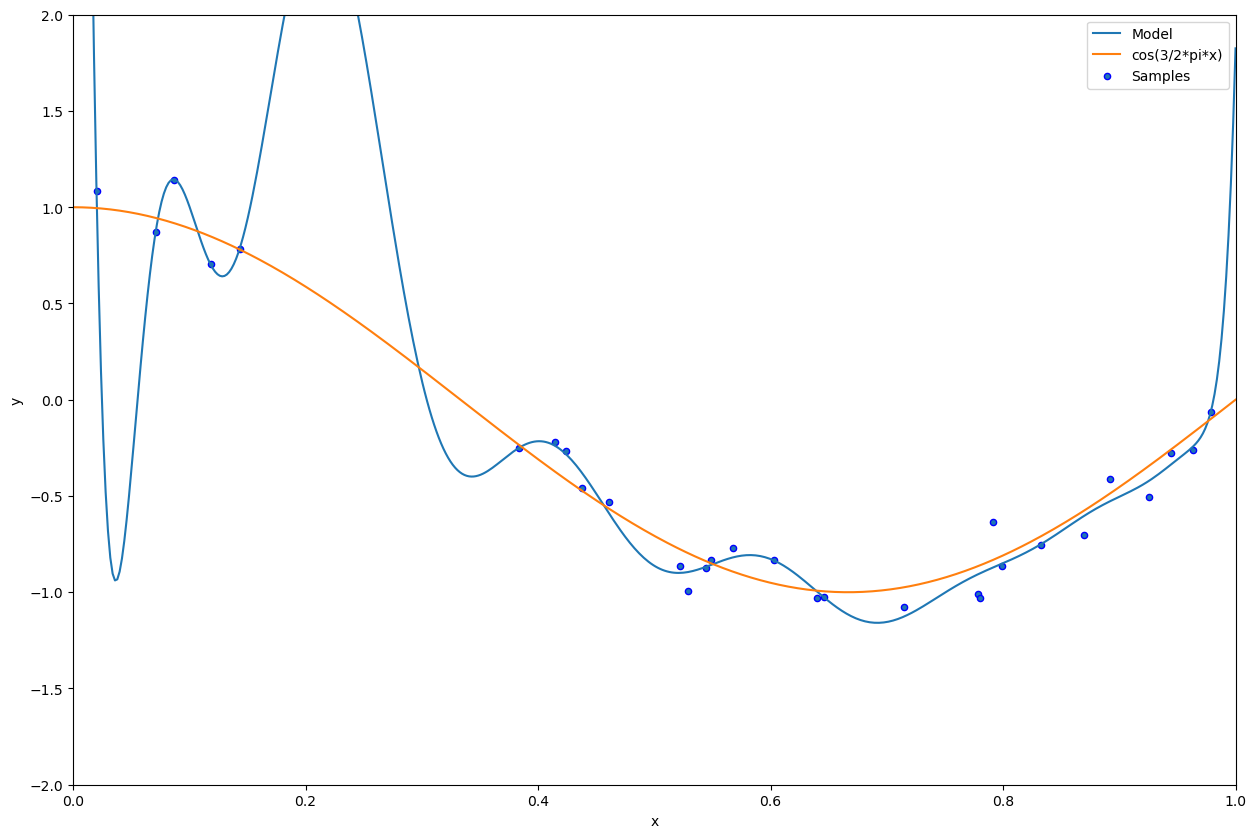

In [15]:
model_and_plot(17, X, y, X_test)


R2 score = -27.459913711327513
MSE = 12.965526635779975


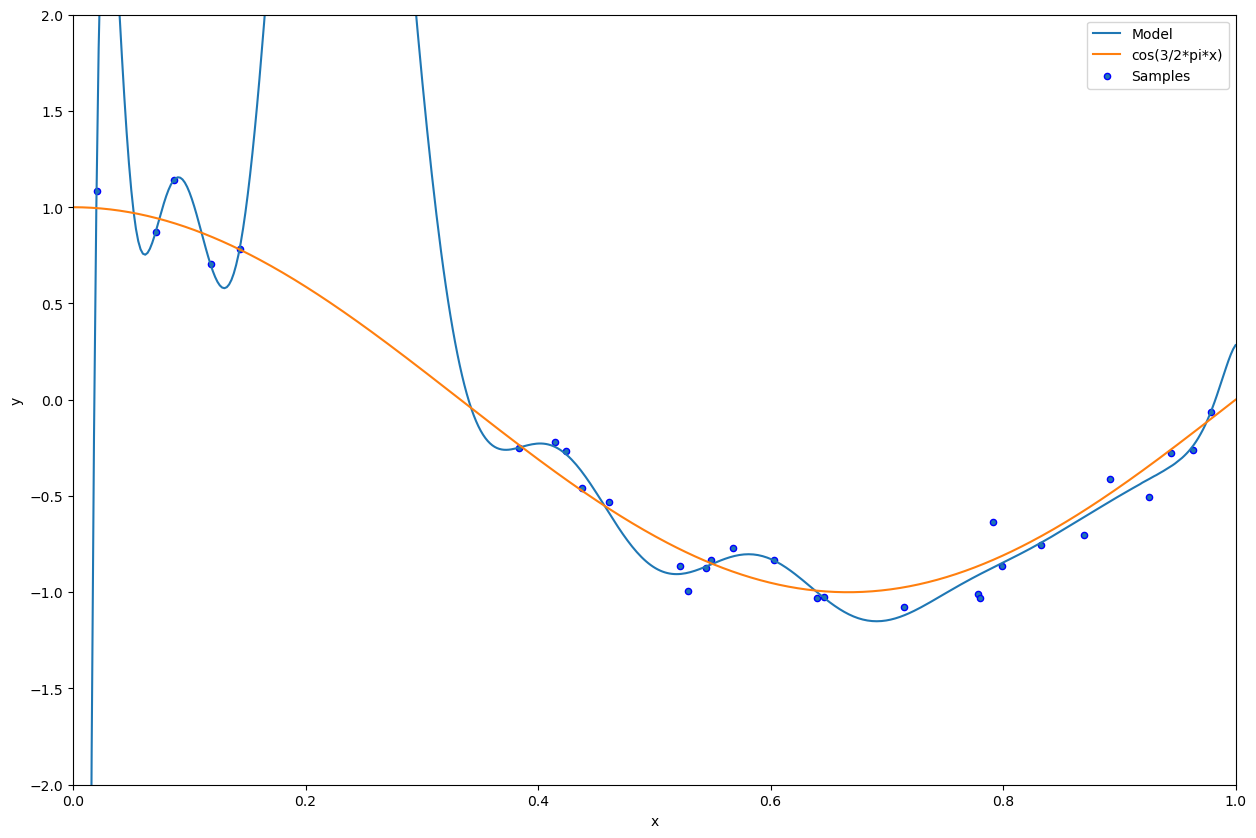

In [16]:
model_and_plot(18, X, y, X_test)

[0.18, 0.0015, 0.006, 0.0017, 0.0039, 0.12, 1.433]


Text(0, 0.5, 'MSE')

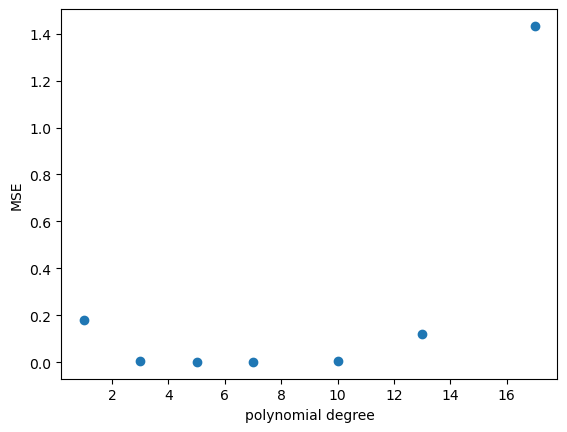

In [17]:
mse_array=[0.18, 0.0015, 0.006, 0.0017, 0.0039, 0.12,  1.433] # taken manually from above..., we could automate that...
k_degree = [1, 5, 10, 7, 3, 13, 17]
print(mse_array)
plt.plot(k_degree,mse_array,'o')
plt.xlabel("polynomial degree")
plt.ylabel("MSE")

# underfitting to the left, overfitting to the right, a golden middle
# you would choose k = 3 or 5 here, choose rather low values, no superfluos parameters...